# <font color=cyan>Football League Generator</font>
## Object Oriented Programming Version

In this version of the football league generator inspired by Paul Kelly's video https://youtu.be/JcVpyIFxUDw, I have tried to encapsulate most of the functionality in classes. The class scripts can be found in the current folder.

Requires the following libraries to be installed on your local machine: 
* https://pypi.org/project/pandas/
* https://pypi.org/project/xlwings/
* https://pypi.org/project/ipywidgets/


In [1]:
from MatchSchedule import *
from KeepScore import *
from LeagueTable import *
from ConnectExcel import *
from FilterMatches import *
import ipywidgets as widget
import matplotlib.pyplot as plt

# Teams and Match Schedules
Manually enter your league's names here:

In [2]:
teams = \
    ['Arsenal', 'Brentford', 'Chelsea', 'Everton', 'Fulham', 'Wolves', 'Liverpool', 'Tottenham', 
     'ManCity', 'ManUtd', 'AstonVilla', 'Blackburn', 'QPR', 'Reading', 'WestHam', 'Sunderland', 
     'Southampton', 'Stoke', 'Leicester', 'Leeds']


Use the MatchSchedule class that manage the teams list and match schedules.

In [3]:
# create a new instance
my_schedule = MatchSchedule(teams_list=teams)
# print(my_schedule.teams)

In [4]:
# create the initial schedule
my_schedule.create_schedule()
# print(my_schedule.schedule)

In [5]:
# mirror the schedule such that we obtain the Home and Away matches
my_schedule.mirror_schedule()
# print(my_schedule.schedule)

In [6]:
# next flatten schedule to a 2d list so that convert schedule to a pandas dataframe
my_schedule.flatten_schedule()
# print(my_schedule.flat_schedule)

# Keep Score

You can either simulate scores using the provided random score generator functionallity or enter results manually.


## Simulate scores

Use the provided KeepScore.py class.

In [7]:
# create new instance
my_scores = KeepScore(my_schedule)

In [8]:
# configure empty scores for each match
my_scores.config_match_scores()
# print(my_schedule.scores)

In [9]:
# simulate match scores randomly
my_scores.generate_random_match_scores()
print(my_scores.scores)

     event  match    host_team  guest_team host_score guest_score
0        1      1      ManCity         QPR          0           0
1        1      2    Liverpool     Everton          1           0
2        1      3       Fulham   Tottenham          0           3
3        1      4  Southampton       Stoke          0           1
4        1      5        Leeds   Blackburn          0           3
..     ...    ...          ...         ...        ...         ...
375     38    376       Wolves       Leeds          3           8
376     38    377      Arsenal  AstonVilla          0           0
377     38    378      Chelsea      ManUtd          2           1
378     38    379      WestHam   Brentford          6           0
379     38    380    Leicester  Sunderland          1           0

[380 rows x 6 columns]


## Inputing scores via xlwings

Requires install: https://pypi.org/project/xlwings/

```pip install xlwings```

<font color=red>Coming soon...</font>

In [10]:
# create new instance
# xlconn = ConnExcel(my_scores)

In [11]:
# view simulated results in excel (optional) - requires https://pypi.org/project/xlwings/
# xlconn.view_results_in_excel()

# League table

Putting the league table in a pandas DataFrame as it is easier to analyze.

In [12]:
# create new instance
my_league = LeagueTable(my_scores)

In [13]:
# # update_table(df_league, df_matches)
my_league.update_table()
# print(my_league.league)

In [14]:
my_league.sort_table()
print(my_league.league)

           Team  MP   W   D   L   GF   GA  GD  Pts
0       ManCity  38  20   6  12   96   75  21   66
1     Liverpool  38  20   4  14  101   71  30   64
2       Everton  38  19   5  14   95   70  25   62
3         Leeds  38  19   4  15  107   94  13   61
4           QPR  38  17   8  13   87   55  32   59
5       Reading  38  18   5  15  102   86  16   59
6        Wolves  38  17   7  14   86   69  17   58
7     Tottenham  38  16   9  13   78   66  12   57
8       Arsenal  38  16   9  13   66   58   8   57
9    Sunderland  38  16   9  13   83   88  -5   57
10    Blackburn  38  15  11  12   79   72   7   56
11    Brentford  38  16   6  16   76   75   1   54
12        Stoke  38  16   5  17   97  100  -3   53
13      Chelsea  38  16   4  18   68   96 -28   52
14   AstonVilla  38  14   8  16   83   89  -6   50
15    Leicester  38  14   8  16   60   86 -26   50
16      WestHam  38  13   5  20   78  107 -29   44
17  Southampton  38  12   6  20   87  101 -14   42
18       ManUtd  38  12   6  20

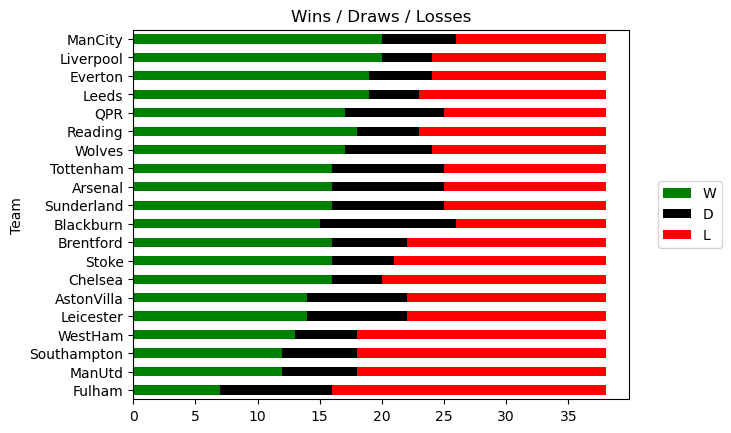

In [15]:
_ = my_league.plot_wins_draw_losses()

# Filter matches on a team

Requires installation on local machine: https://pypi.org/project/ipywidgets/

```pip install ipywidgets```

In [16]:
team_filter = FilterMatches(my_scores, my_schedule)

In [17]:
# create dropdown list widget instance
dd_widget = widget.Dropdown(options=sorted(my_schedule.original_teams), description='Select team:')

In [18]:
# display dropdown list, then please make selection
dd_widget

Dropdown(description='Select team:', options=('Arsenal', 'AstonVilla', 'Blackburn', 'Brentford', 'Chelsea', 'E…

In [19]:
team_filter.selected_team = str(dd_widget.value)
print(f"You have selected: {team_filter.selected_team}")

You have selected: Arsenal


## Wins, Draws and Losses 

Wins, draws and losses history for the selected team.

In [20]:
filtered_matches = team_filter.get_filtered_team_matches(team_filter.selected_team)
filtered_matches.style.applymap(team_filter.color_result, subset=[team_filter.selected_team + '_WDL']) 

,event,match,host_team,guest_team,host_score,guest_score,Arsenal_WDL
0,1,8,Brentford,Arsenal,7,2,-1
1,2,19,Leicester,Arsenal,0,2,1
2,3,30,Chelsea,Arsenal,2,1,-1
3,4,40,Arsenal,Wolves,0,5,-1
4,5,49,Arsenal,Blackburn,2,3,-1
5,6,58,Arsenal,Tottenham,1,0,1
6,7,67,Arsenal,QPR,0,0,0
7,8,76,Arsenal,Fulham,0,0,0
8,9,85,Arsenal,Leeds,5,1,1
9,10,94,Arsenal,ManUtd,2,1,1


## Goals Analysis

Analysis of goals scored for and agains the selected team.

In [21]:
# Get GF and GA for selected team:
goals_for, goals_against = team_filter.get_goals_for_and_against(filtered_matches, team_filter.selected_team)

# print('GF', goals_for)
# print('GA', goals_against)


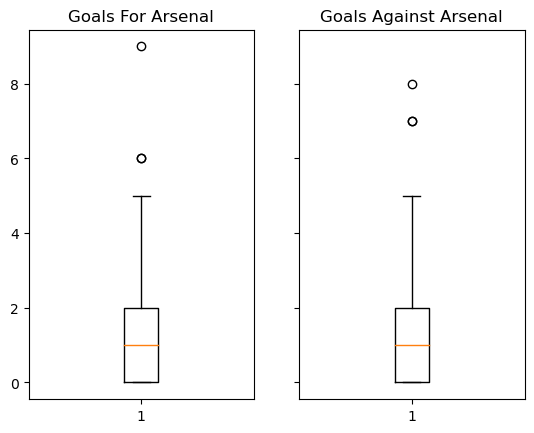

In [22]:
# Box-whisker plot: "Min", 25th perc, 50th perc (Median), 75 perc, "Max", outliers.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
ax1.boxplot(goals_for)
ax1.set_title(f'Goals For {team_filter.selected_team}')

ax2.boxplot(goals_against)
ax2.set_title(f'Goals Against {team_filter.selected_team}')

plt.show()